# **Modeling Homework #2**
### **Created by Zoe Flanzer**

In this notebook I will...
* Run a model that shows carbon fluxes between the biosphere and atmosphere
* Examine the impacts of anthropogenic emissions on carbon in the biosphere and atmosphere
* See how different mitigation strategies may influence atmospheric carbon


In [41]:
# Mounting notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Importing important libraries
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Problem A: Modify and rerun the model

Defining important variables:

In [42]:
# defining starting mass of carbon [Gt]
M1i = 1100.0 # atmosphere
M2i = 300.0 # biosphere

# defining fluxes [Gt/yr]
k12 = 0.0003 # atmo to bio
k21 = 0.1 # bio to atmo

# defining time-related variables
ti = 0.0 # initial time
tf = 100.0 # final time
dt = 1/365 # time step

Creating an array of numbers, each representing one time step between the initial and final times:

In [43]:
t = np.arange(ti,tf+dt,dt) # creating an array of time steps between the initial and final times

Nt = t.size # defining the size of the array

print('t has '+str(Nt)+' time steps') # printing the number of time steps in the array

t has 36501 time steps


Filling arrays with zeros:

In [44]:
M1 = np.zeros((Nt,)) # atmo
M2 = np.zeros((Nt,)) # bio

Populating the array with values:

In [45]:
for i in np.arange(Nt): # loop through time steps, populate the array of 0s with values
    if (i==0):

        M1[i] = M1i # if M1 is zero, it's defined at the initial step of the M1 array
        M2[i] = M2i # if M2 is zero, it's defined at the initial step of the M2 array

    else:
        dM1dt = k21*M2[i-1] - k12*M1[i-1] # M1 array -- each timestep multiplied by the atmo to bio flux subtracted by timestep * bio to atmo flux
        dM2dt = k12*M1[i-1] - k21*M2[i-1] # M2 array -- each timestep multiplied by the bio to atmo flux subtracted by the timestep * atmo to bio flux

        M1[i] = M1[i-1] + dM1dt*dt # populating array with M1 timesteps plus dM1dt data to make cumulative array
        M2[i] = M2[i-1] + dM2dt*dt # populating array with M2 timesteps plus dM2dt data to make cumulative array

Calculating the analytical solutions:

In [46]:
M1_anlt = (k21*(M1i+M2i))/(k12+k21) + (k12*M1i - k21*M2i)/(k12+k21)*np.exp(-(k12+k21)*t) # atmo
M2_anlt = (k12*(M1i+M2i))/(k12+k21) - (k12*M1i - k21*M2i)/(k12+k21)*np.exp(-(k12+k21)*t) # bio

Plotting carbon in the atmosphere and biosphere over time:

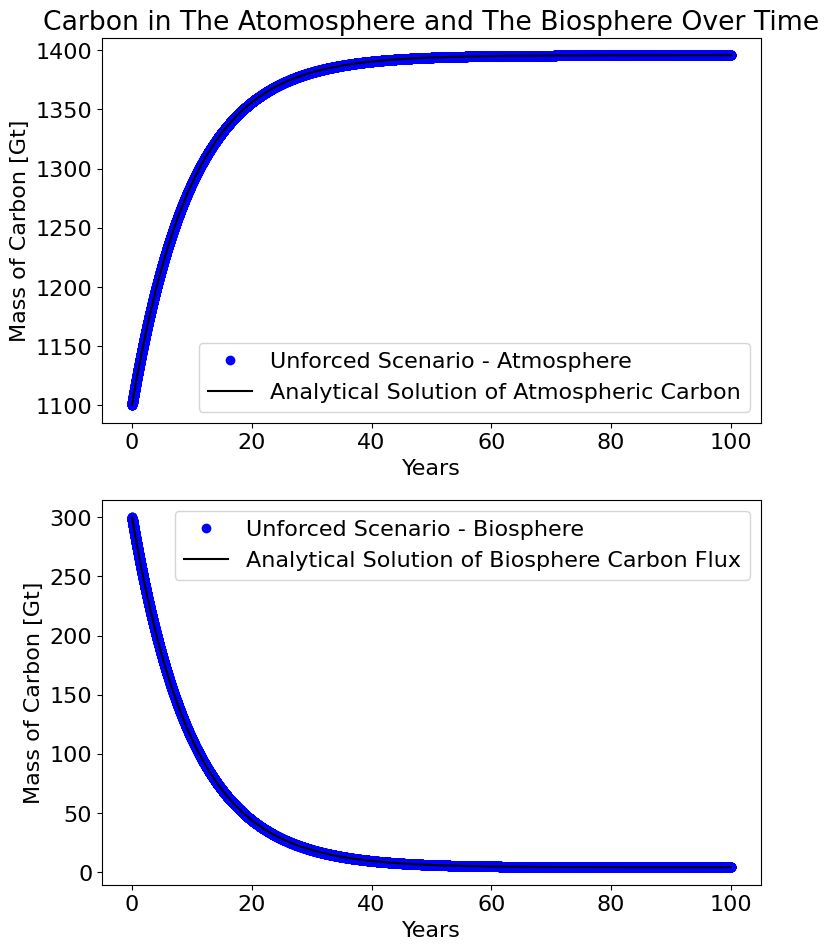

In [47]:
plt.figure(figsize=(8.5,11)) # calling for new plot
plt.rcParams.update({'font.size': 16}) # setting plot parameters

plt.subplot(2,1,1) # creating first plot showing carbon in the atmpshere
plt.title('Carbon in The Atomosphere and The Biosphere Over Time')
plt.plot(t,M1,'bo', label='Unforced Scenario - Atmosphere') # adding 'true' solution
plt.plot(t,M1_anlt,'k-', label='Analytical Solution of Atmospheric Carbon') # adding analytical solution
plt.xlabel('Years')
plt.ylabel('Mass of Carbon [Gt]')
plt.legend()

plt.subplot(2,1,2) # creating second plot showing carbon in the biosphere
plt.plot(t,M2,'bo', label='Unforced Scenario - Biosphere') # adding 'true solution'
plt.plot(t,M2_anlt,'k-', label='Analytical Solution of Biosphere Carbon Flux') # adding analytical solution
plt.xlabel('Years')
plt.ylabel('Mass of Carbon [Gt]')
plt.legend()

plt.show()

Printing values at the end of the simulation:

In [48]:
# finding final value of both arrays
M1L = M1[-1]
M2L = M2[-1]

# printing final values of both arrays
print(f"There are {M1L} Gt of carbon in the atmosphere (M1) and {M2L} Gt of carbon in the biosphere (M2).")

There are 1395.799547307703 Gt of carbon in the atmosphere (M1) and 4.200452692299009 Gt of carbon in the biosphere (M2).


## Problem B: Examine impacts of human emissions

Loading data

In [49]:
AE = np.loadtxt('/content/drive/MyDrive/Modeling/Module 2/AnthropogenicEmissions.1751_2008.csv', delimiter=',', skiprows=1) # loading anthro emissions data-- telling python there's a comma seperating data and to skip the header

AE_vals = np.array(AE) # converting data to array

AEyrs = AE[:,0] # defining years column
AEemv = AE[:,1] # defining emission values

Plotting anthropogenic emissions data

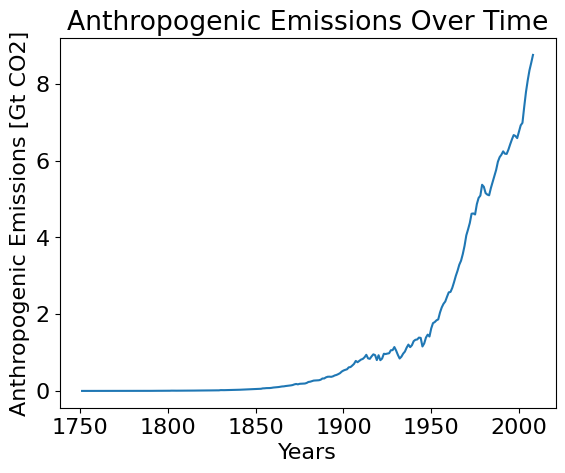

In [50]:
plt.figure()
plt.plot(AEyrs, AEemv) # plotting anthro emissions
plt.xlabel('Years')
plt.ylabel('Anthropogenic Emissions [Gt CO2]')
plt.title('Anthropogenic Emissions Over Time')

plt.show()

Defining new/changed variables

In [51]:
tf = 257.0 # final time
dt = 1 # time step

In [52]:
t = np.arange(ti,tf+dt,dt) # defining time series

Nt = t.size # defining the size of the array

print('t has '+str(Nt)+' time steps') # printing the number of time steps in the array

t has 258 time steps


Populating the arrays with zeros

In [53]:
M1 = np.zeros((Nt,)) # atmosphere
M2 = np.zeros((Nt,)) # biosphere

Adding anthropogenic emissions term to atmosphere/biosphere carbon simulation

In [54]:
for i in range(Nt): # loop through time steps, populate the array of 0s with values
    if (i==0):

        M1[i] = M1i # if M1 is zero, it's defined at the initial step of the M1 array
        M2[i] = M2i # if M2 is zero, it's defined at the initial step of the M2 array

    else:
        AE = AE_vals[i, 1]
        dM1dt = k21*M2[i-1] - k12*M1[i-1] + AE # M1 array -- each timestep multiplied by the atmo to bio flux subtracted by timestep * bio to atmo flux + anthro forcings
        dM2dt = k12*M1[i-1] - k21*M2[i-1] # M2 array -- each timestep multiplied by the bio to atmo flux subtracted by the timestep * atmo to bio flux

        M1[i] = M1[i-1] + dM1dt*dt # populating array with M1 timesteps plus dM1dt data to make cumulative array
        M2[i] = M2[i-1] + dM2dt*dt # populating array with M2 timesteps plus dM2dt data to make cumulative array

Plotting emissions over time

Text(0, 0.5, 'Mass of Carbon [Gt]')

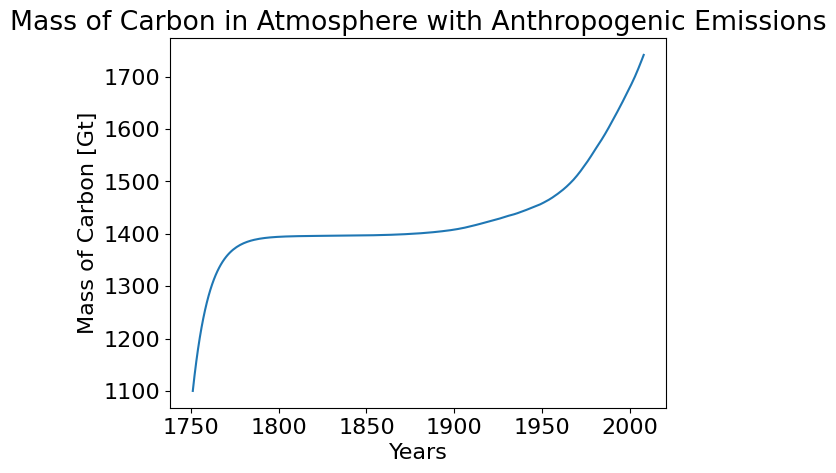

In [55]:
# plot 1 -- mass of C in atmo, including anthro emissions

plt.figure(3)
plt.plot(AEyrs, M1)
plt.title('Mass of Carbon in Atmosphere with Anthropogenic Emissions')
plt.xlabel('Years')
plt.ylabel('Mass of Carbon [Gt]')

Text(0, 0.5, 'Mass of Carbon [Gt]')

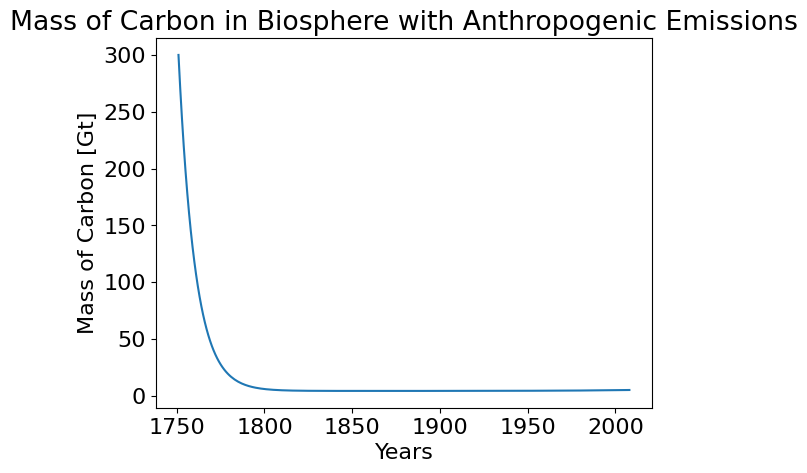

In [56]:
# plot 2 -- mass of C in bio with anthro emissions

plt.figure(4)
plt.plot(AEyrs, M2)
plt.title('Mass of Carbon in Biosphere with Anthropogenic Emissions')
plt.xlabel('Years')
plt.ylabel('Mass of Carbon [Gt]')

Text(0, 0.5, 'Mass of Carbon [Gt]')

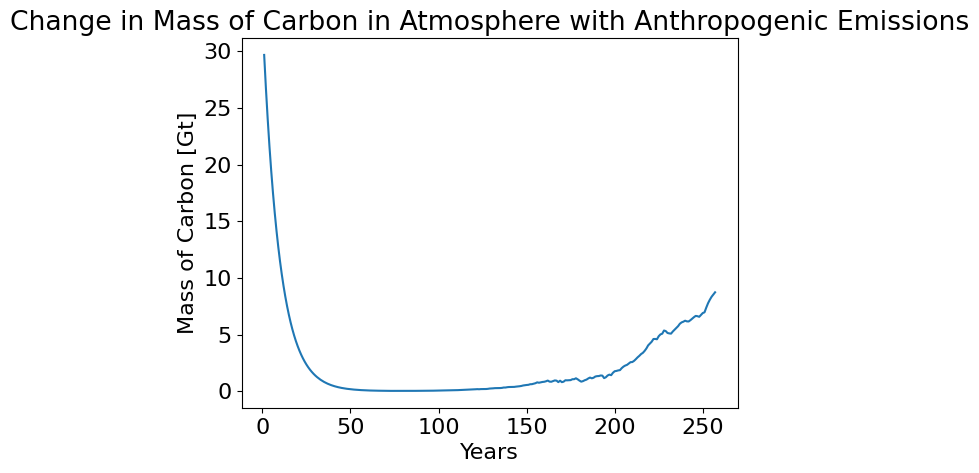

In [57]:
# plot 3 -- change in mass of C in atmo with anthro emissions

M1d = np.diff(M1) # differencing the atmo array

# plotting data
plt.figure(5)
plt.plot(t[1:], M1d)
plt.title('Change in Mass of Carbon in Atmosphere with Anthropogenic Emissions')
plt.xlabel('Years')
plt.ylabel('Mass of Carbon [Gt]')


Text(0, 0.5, 'Mass of Carbon [Gt]')

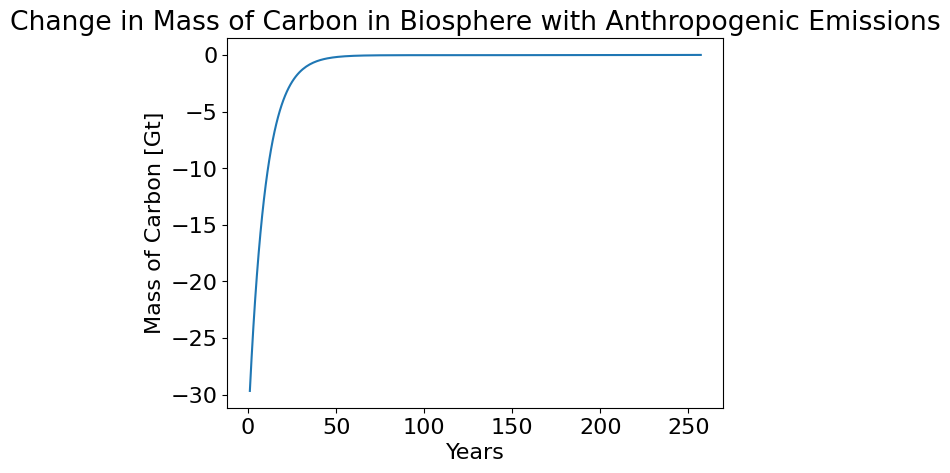

In [58]:
# plot 4 -- change in mass of C in bio with anthro emissions

M2d = np.diff(M2) # differencing the bio array

# plotting
plt.figure(6)
plt.plot(t[1:], M2d)
plt.title('Change in Mass of Carbon in Biosphere with Anthropogenic Emissions')
plt.xlabel('Years')
plt.ylabel('Mass of Carbon [Gt]')

## Problem C: Examine the effects of mitigation

Loading new data

In [59]:
MS = np.loadtxt('/content/drive/MyDrive/Modeling/Module 2/EmissionsMitigationScenarios.2008_2100.csv', delimiter=',', skiprows=1) # loading emissions mitigation csv

MS_vals = np.array(MS) # redefining mitigation data as an array

MSyrs = MS[:,0] # defining years as first column in csv
MS_2030 = MS[:,1] # defining 2030 scenario as second column
MS_2050 = MS[:,2] # defining 2050 scenario as third column
MS_zero = MS[:,3] # defining zero emissions growth scenario as fourth column

### Scenario 1

Re-defining variables

In [60]:
tf = 22.0 # final time
dt = 1 # time step

In [61]:
t = np.arange(ti,tf+dt,dt) # defining time series

Nt = t.size # defining the size of the array

print('t has '+str(Nt)+' time steps') # printing the number of time steps in the array

t has 23 time steps


Populating arrays with zeros

In [62]:
M1_2030 = np.zeros((Nt,)) # atmosphere
M2_2030 = np.zeros((Nt,)) # biosphere

Adding 2030 emissions scenario to carbon simulation

In [63]:
for i in range(Nt): # loop through time steps, it will populate the array of 0s with values
    if (i==0):

        M1_2030[i] = M1i # if M1 is zero, it's defined at the initial step of the M1 array
        M2_2030[i] = M2i # if M2 is zero, it's defined at the initial step of the M2 array

    else:
        AE = MS_2030[i] # defining anthropogenic emissions as the 2030 scenario
        dM1dt = k21*M2[i-1] - k12*M1[i-1] + AE
        dM2dt = k12*M1[i-1] - k21*M2[i-1]

        M1_2030[i] = M1_2030[i-1] + dM1dt*dt # populating cumulative array of carbon in the atmosphere
        M2_2030[i] = M2_2030[i-1] + dM2dt*dt # populating a cumulative array of carbon in the biosphere

Defining variable that specifies the number of years in the 2030 simulation

In [64]:
yrs_2030 = MSyrs[:23]

### Scenario 2

Re-defining variables

In [65]:
tf = 42.0 # final time
dt = 1 # time step

In [66]:
t = np.arange(ti,tf+dt,dt) # defining time series

Nt = t.size # defining the size of the array

print('t has '+str(Nt)+' time steps') # printing the number of time steps in the array

t has 43 time steps


Populating arrays with zeros

In [67]:
M1_2050 = np.zeros((Nt,)) # atmosphere
M2_2050 = np.zeros((Nt,)) # biosphere

Adding 2050 emissions scenario to carbon simulation

In [68]:
for i in range(Nt): # loop through time steps, it will populate the array of 0s with values
    if (i==0):

        M1_2050[i] = M1i # if M1 is zero, it's defined at the initial step of the M1 array
        M2_2050[i] = M2i # if M2 is zero, it's defined at the initial step of the M2 array

    else:
        AE = MS_2050[i] # defining anthropogenic emissions as 2050 mitigation scenario
        dM1dt = k21*M2[i-1] - k12*M1[i-1] + AE
        dM2dt = k12*M1[i-1] - k21*M2[i-1]

        M1_2050[i] = M1_2050[i-1] + dM1dt*dt # populating cumulative array of C in atmosphere
        M2_2050[i] = M2_2050[i-1] + dM2dt*dt # populating cumulative array of C in biosphere

Defining variable that specifies the number of years in the 2050 simulation

In [69]:
yrs_2050 = MSyrs[:43]

### Scenario 3


Re-defining variables

In [70]:
tf = 92.0 # final time
dt = 1 # time step

In [71]:
t = np.arange(ti,tf+dt,dt) # defining time series

Nt = t.size # defining the size of the array

print('t has '+str(Nt)+' time steps') # printing the number of time steps in the array

t has 93 time steps


Populating arrays with zeros

In [72]:
M1_zero = np.zeros((Nt,)) # atmosphere
M2_zero = np.zeros((Nt,)) # biosphere

Adding the constant emissions scenario to carbon simulation

In [73]:
for i in range(Nt): # loop through time steps, it will populate the array of 0s with values
    if (i==0):

        M1_zero[i] = M1i # if M1 is zero, it's defined at the initial step of the M1 array
        M2_zero[i] = M2i # if M2 is zero, it's defined at the initial step of the M2 array

    else:
        AE = MS_zero[i]
        dM1dt = k21*M2[i-1] - k12*M1[i-1] + AE # M1 array -- each timestep multiplied by the atmo to bio flux subtracted by timestep * bio to atmo flux + anthro forcings
        dM2dt = k12*M1[i-1] - k21*M2[i-1] # M2 array -- each timestep multiplied by the bio to atmo flux subtracted by the timestep * atmo to bio flux

        M1_zero[i] = M1_zero[i-1] + dM1dt*dt # populating array with M1 timesteps plus dM1dt data to make cumulative array
        M2_zero[i] = M2_zero[i-1] + dM2dt*dt # populating array with M2 timesteps plus dM2dt data to make cumulative array

### Plots

Mass of carbon in the atmosphere

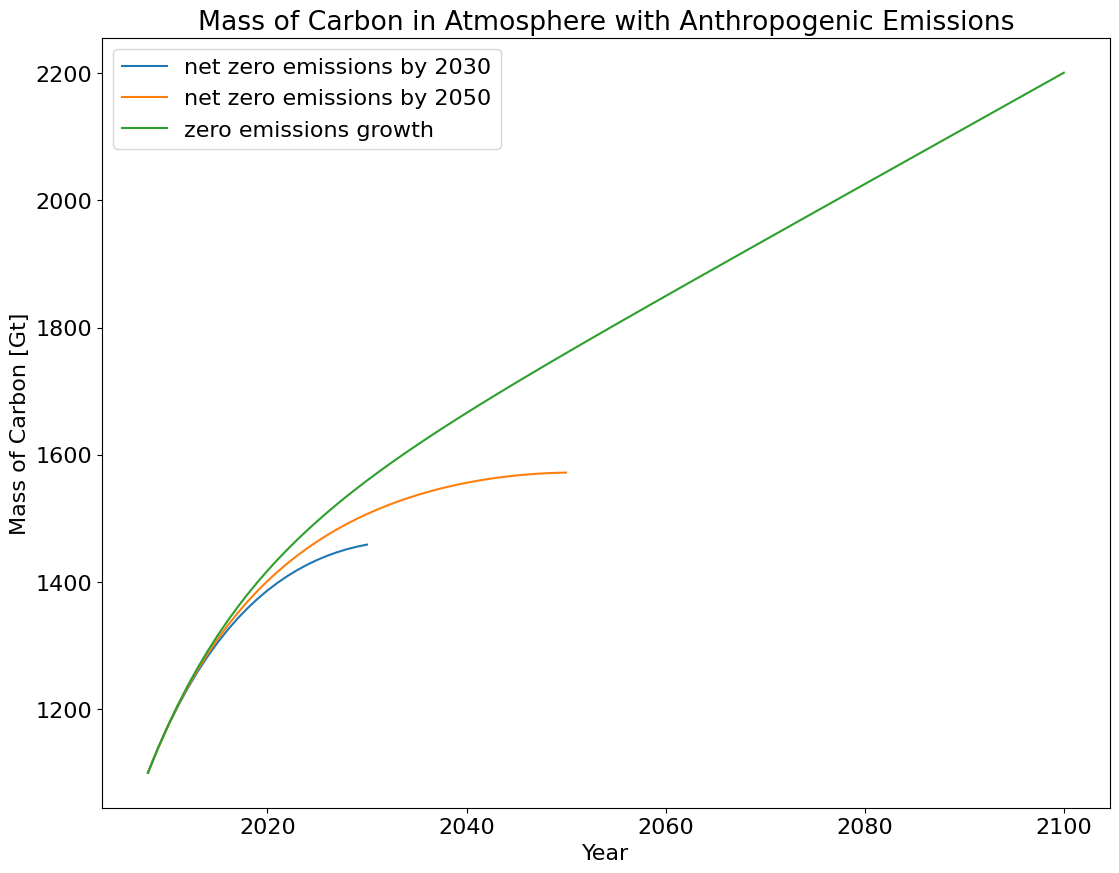

In [74]:
plt.figure(figsize=(13,10))
plt.plot(yrs_2030, M1_2030, label='net zero emissions by 2030') # plotting 2030 scenario
plt.plot(yrs_2050, M1_2050, label='net zero emissions by 2050') # plotting 2050 scenario
plt.plot(MSyrs, M1_zero, label='zero emissions growth') # plotting constant emissions scenario
plt.title('Mass of Carbon in Atmosphere with Anthropogenic Emissions')
plt.xlabel('Year')
plt.ylabel('Mass of Carbon [Gt]')
plt.legend()

Mass of carbon in the biosphere

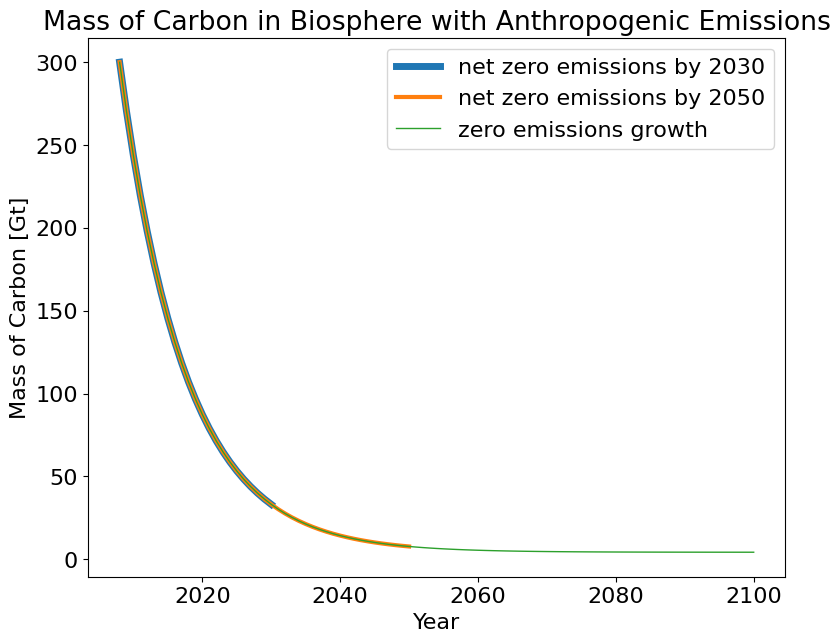

In [75]:
plt.figure(figsize=(9,7))
plt.plot(yrs_2030, M2_2030, linewidth=5, label='net zero emissions by 2030') # plotting 2030 scenario with widest line so that it is visible
plt.plot(yrs_2050, M2_2050, linewidth=3, label='net zero emissions by 2050') # plotting 2050 scenario with inbetween line so that it is visible
plt.plot(MSyrs, M2_zero, linewidth=1, label='zero emissions growth') # plotting constant emissions scenario
plt.title('Mass of Carbon in Biosphere with Anthropogenic Emissions')
plt.xlabel('Year')
plt.ylabel('Mass of Carbon [Gt]')
plt.legend()

The change in mass of carbon in the atmosphere

In [82]:
# differencing each array -- atmosphere

M1d_2030 = np.diff(M1_2030)
M1d_2050 = np.diff(M1_2050)
M1d_zero = np.diff(M1_zero)

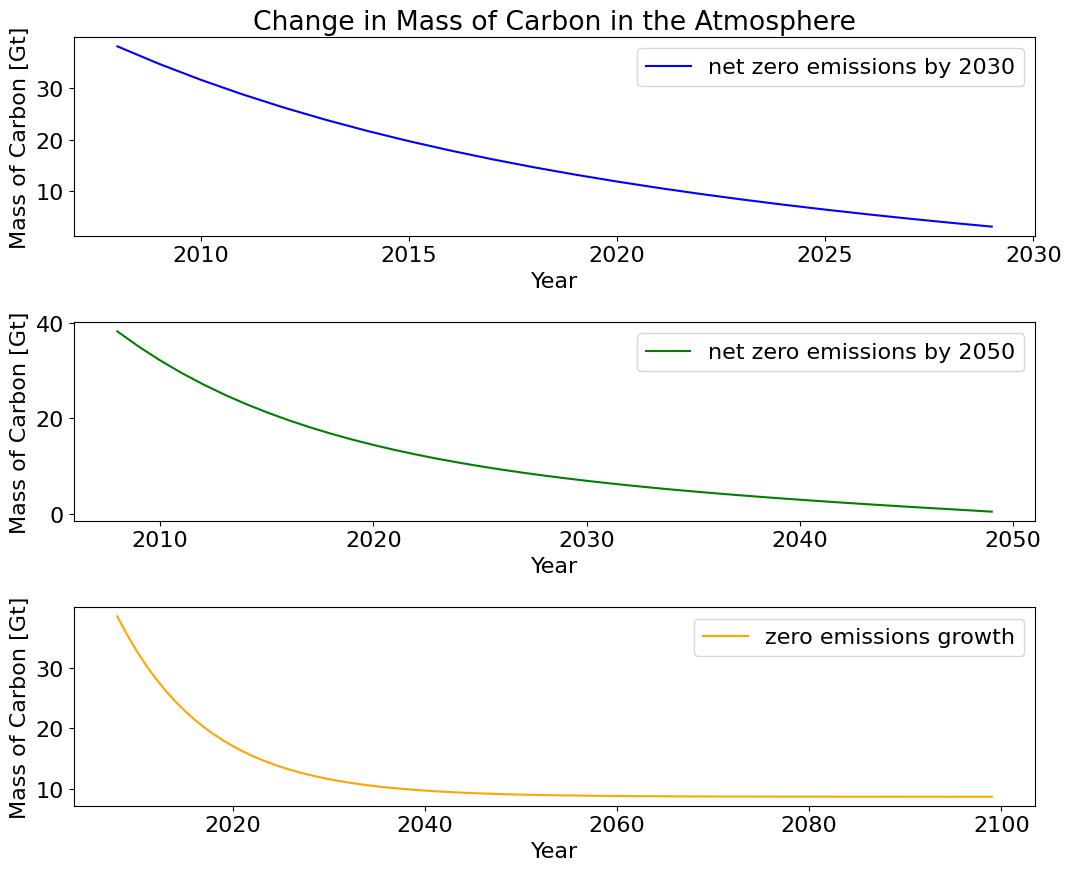

In [83]:
plt.figure(figsize=(11,9))

# plotting 2030 scenario
plt.subplot(3, 1, 1)
plt.plot(MSyrs[:22], M1d_2030, color='blue', label='net zero emissions by 2030')
plt.title('Change in Mass of Carbon in the Atmosphere')
plt.xlabel('Year')
plt.ylabel('Mass of Carbon [Gt]')
plt.legend()

# plotting 2050 scenario
plt.subplot(3, 1, 2)
plt.plot(MSyrs[:42], M1d_2050, color='green', label='net zero emissions by 2050')
plt.xlabel('Year')
plt.ylabel('Mass of Carbon [Gt]')
plt.legend()

# plotting constant emissions scenario
plt.subplot(3, 1, 3)
plt.plot(MSyrs[:92], M1d_zero, color='orange', label='zero emissions growth')
plt.xlabel('Year')
plt.ylabel('Mass of Carbon [Gt]')
plt.legend()

plt.tight_layout()

The change in mass of carbon in the atmosphere

In [84]:
# differencing each array -- biosphere

M2d_2030 = np.diff(M2_2030)
M2d_2050 = np.diff(M2_2050)
M2d_zero = np.diff(M2_zero)

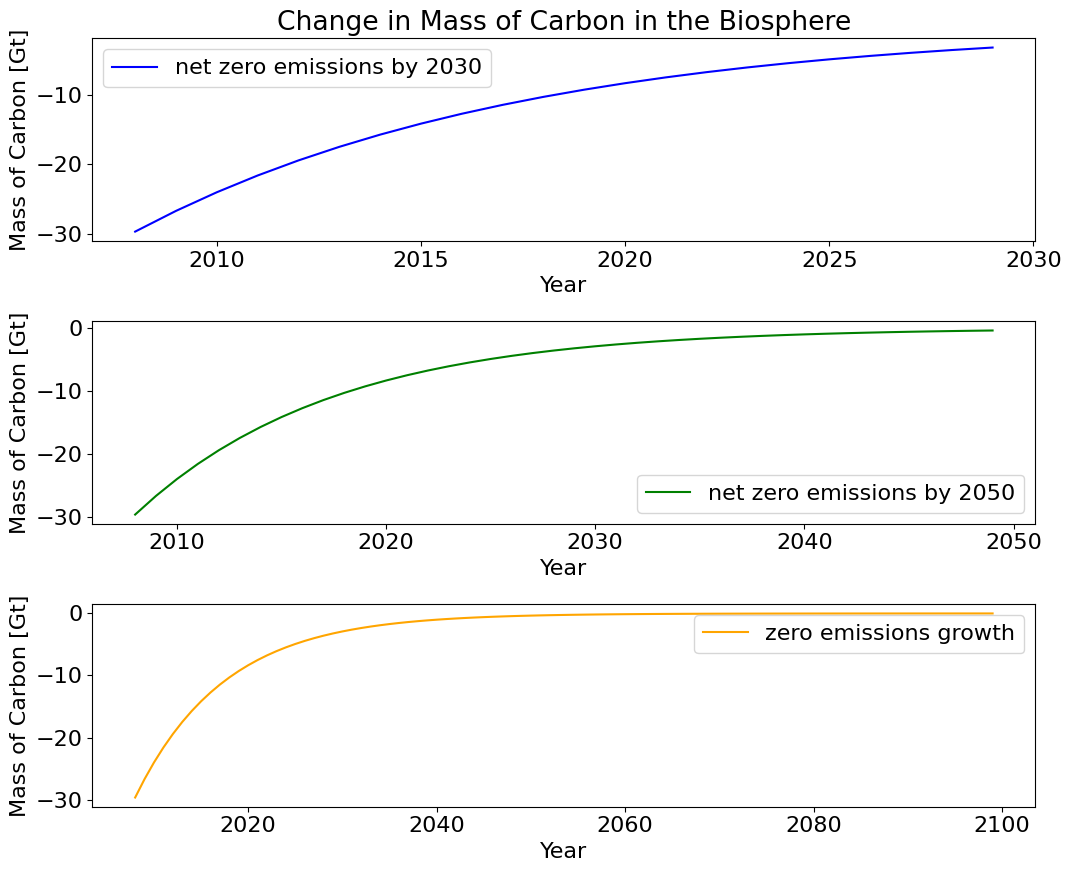

In [85]:
plt.figure(figsize=(11,9))

# plotting 2030 scenario
plt.subplot(3, 1, 1)
plt.plot(MSyrs[:22], M2d_2030, color='blue', label='net zero emissions by 2030')
plt.title('Change in Mass of Carbon in the Biosphere')
plt.xlabel('Year')
plt.ylabel('Mass of Carbon [Gt]')
plt.legend()

# plotting 2050 scenario
plt.subplot(3, 1, 2)
plt.plot(MSyrs[:42], M2d_2050, color='green', label='net zero emissions by 2050')
plt.xlabel('Year')
plt.ylabel('Mass of Carbon [Gt]')
plt.legend()

# plotting constant emissions scenario
plt.subplot(3, 1, 3)
plt.plot(MSyrs[:92], M2d_zero, color='orange', label='zero emissions growth')
plt.xlabel('Year')
plt.ylabel('Mass of Carbon [Gt]')
plt.legend()

plt.tight_layout()